<a href="https://colab.research.google.com/github/jaearao/App-155/blob/Assignments/ARAO_lab_assignment_module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Arao, John Robert\
_Student No._: 2022-01967\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_: 10/20/2024 11pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: John Robert B. Arao**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


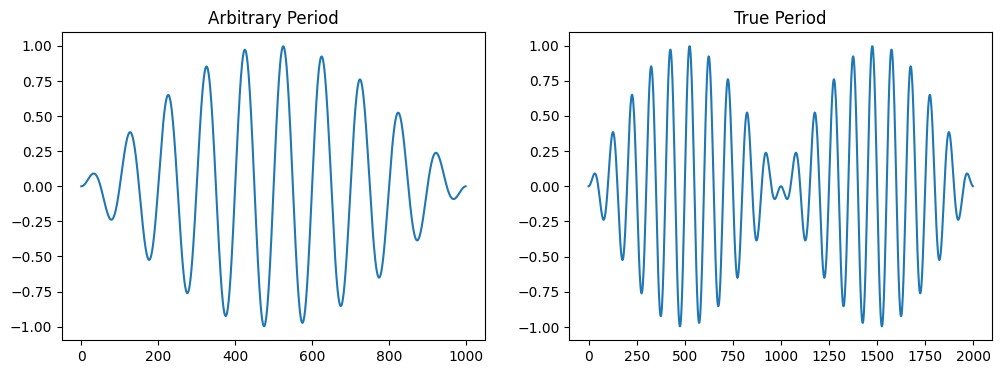

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp

#Assign the given N
N = 1000

#Define the y_0 for just length N
n_0 = np.linspace(0, N, N, endpoint = False)
y_0 = np.zeros(len(n_0))                                              #assign a storage with the length of n
for i in range(len(n_0)):                                              #define the y in each n
  y_0[i] = np.sin((np.pi*n_0[i])/(N))*np.sin((20*np.pi*n_0[i])/(N))

#Redefine an n using the right period
n = np.linspace(0, 2*N, N, endpoint = False)
y = np.zeros(len(n))                                              #assign a storage with the length of n
for i in range(len(n)):                                           #define the y in each n
  y[i] = np.sin((np.pi*n[i])/(N))*np.sin((20*np.pi*n[i])/(N))


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.style.use('seaborn-v0_8-dark-palette')                         #assign a style to the plot
ax[0].plot(n_0, y_0)                                               #plot the y_0 as a function of n_0
ax[0].set_title("Arbitrary Period")


ax[1].plot(n, y)                                                   #plot the y as a function of n
ax[1].set_title("True Period")
plt.show()

Using only N as the end point of n assumes that N is the period of the sinusoidal function. This is not always true as N can be any number. Hence, although the modulated sine wave seem to depict one period of the sinusoidal function, it is not the true period of the function.

In computing the period of a function, consider: $sin(\omega x)$

\begin{align}
        \tau = \frac{2\pi}{\omega}
  \end{align}

Hence, for $sin \left(\frac{\pi}{N}n \right)$,

\begin{align}
      & \omega = \frac{\pi}{N} \\ &
      \tau = \frac{2\pi}{\frac{\pi}{N}} = 2N
  \end{align}

Now, altering the initial configuration to the right period of the sinusoid would show the right form of the sinusoid for the fourier transform operation derived from the form:

\begin{align}
      \gamma_k = \int_{0}^{L} f(x)  
       e^\left(-i \frac{2\pi kx}{L}\right) dx
  \end{align}

where, interval from 0 to L is repeated over and over again. Nonetheless, the the same method can solve non-periodic functions for a certain interest interval with a caveat. This is demonstrated below.

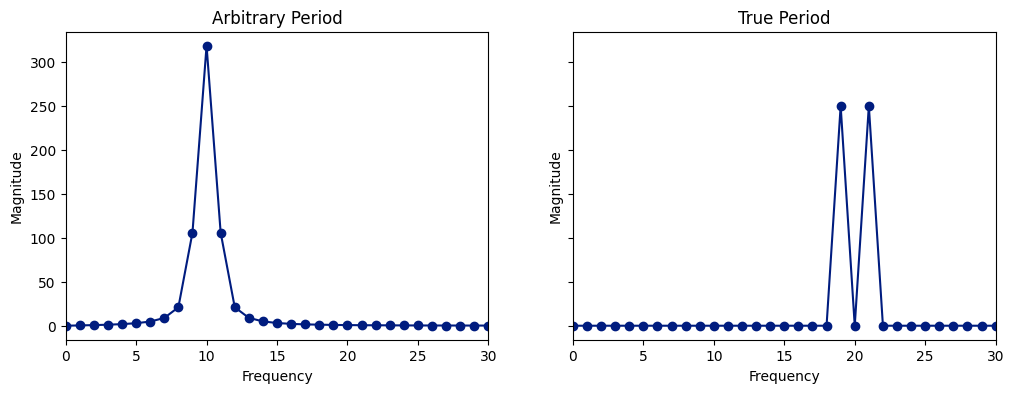

In [ ]:
def fourier(y):
  N = len(y)
  c = np.zeros(N//2+1, complex)
  for k in range (N//2+1):
    for n in range(N):
      c[k] += y[n]*exp(-2j*np.pi*n*k/N)
  return c

#call the DFT to both configurations
x_0 = fourier(y_0)
x = fourier(y)

#Define a subplot to make a plot both configurations
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

#Plot the 1st configuration

ax[0].plot(abs(x_0), marker ="o")
ax[0].set_xlim([0, 30])
ax[0].set_title("Arbitrary Period")
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Magnitude")

#Plot the 2nd configuration
ax[1].plot(abs(x), marker ="o")
ax[1].set_title("True Period")
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Magnitude")
plt.show()

The two figures above shows the fourier transform of an arbitrary interval [0,L] and true periodic interval [0, 2L].

> The fourier transform of the function within an arbitrary interval shows only one of the peaks of the sinusoidal wave. This is expected as it only involves that one peak of the function and assumes to repeat the behavior of that specific interval.

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
!ls drive/My\ Drive/

'1st Year'			   Classroom		     ORGANIZATIONS
 1x1.png			  'Colab Notebooks'	    'Probset 6.pdf'
'2nd Year'			  'General Files'	     Scholarships
'3rd Year'			   GoodNotes		     Takeout
'Affidavit of ITR.pdf'		   IMG_9965.JPG		    'TCG 2024-Midyear.pdf'
'Arao_Third Week Reflection.pdf'  'Meeting Reports'	    'TCG 2024 MISDYEAR'$'\t''.pdf'
 Budget.gsheet			  'Module 5 .gdoc'
'Certificate of Residency.pdf'	  'Nobel Prize TikTok Vid'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/MyDrive/3rd Year/Applied Physics 155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [4]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [5]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

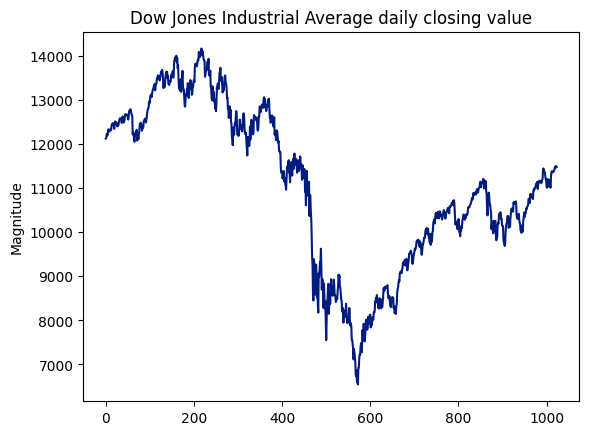

In [9]:
#Plot the values of from the dataset
plt.plot(dow)
plt.title('Dow Jones Industrial Average daily closing value')
plt.ylabel('Magnitude')
plt.show()

###Fourier Transform

The fourier transform shifts the function from the time space to the frequency space.

\begin{align}
        F(\omega) = \int_{-∞}^{∞} f(t) e^{-i\omega t} dt
  \end{align}

This means that a basic sine wave signal will give a single peak at its frequency. For a noisy signal with inconsistent frequency or behavior, it is expected for the fourier transform to show different peaks.

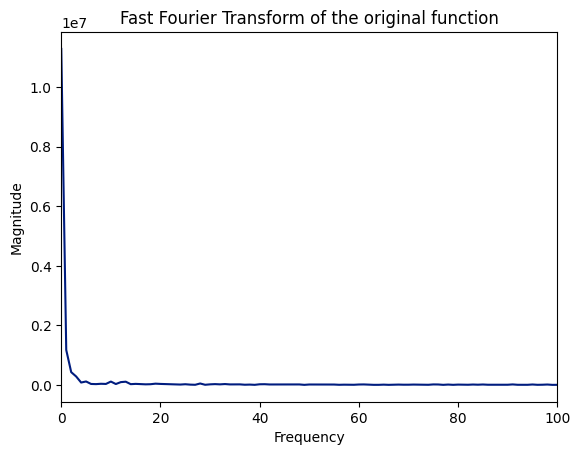

In [20]:
c = np.fft.rfft(dow) #Use the rfft function of numpy

#Plot the fourier transform
plt.plot(abs(c))
plt.title('Fast Fourier Transform of the original function')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([0, 100])
plt.show()

### Result of the Fourier Transforms

As seen from the Dow Jones Industrial Average daily closing value graph, it is a noisy signal with a clear changes in frequency. Hence, we should expect values in more than one frequency.

This is proven in the graph above showing that it is not a single valued function. It also says that changes in the frequency happens multiple times. We can also see that the highest peak of frequency is near zero.


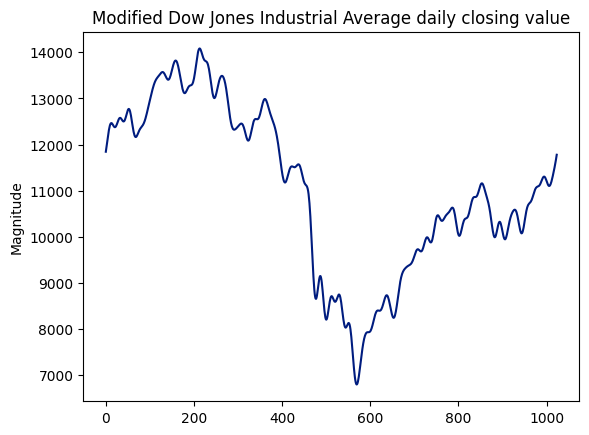

In [24]:
#Set the >10% of the fourier transform to zero
for i in range(len(c)):
  if i > len(c)*0.1:
    c[i]=0

#Plot the modified fourier transform
d = np.fft.irfft(c)
plt.plot(abs(d))
plt.title('Modified Dow Jones Industrial Average daily closing value')
plt.ylabel('Magnitude')
plt.show()

### Modified Frequency Space

Setting most of the frequencies -- not including the highest point -- from the fourier transform to zero removes the transitions to those frequencies. This results to a less noisier graph. And leaving the most common frequency means that the time would still show the major features of the function in time.

However, one must be careful in removing seemingly unimportant frequencies. This might already violate the minimum Nyquist frequency for an accurate signal processing.

\begin{align}
      f_{N} = \frac{f_s}{2}
  \end{align}

where, to get an accurate $F_N$ frequency, the data sampling rate $f_s$ is atleast twice the $F_N$. This means that if you have zeroed out a significant amount of frequency that lowered the sampling rate of the original signal to less than half of the peak frequency, aliasing is imminent.

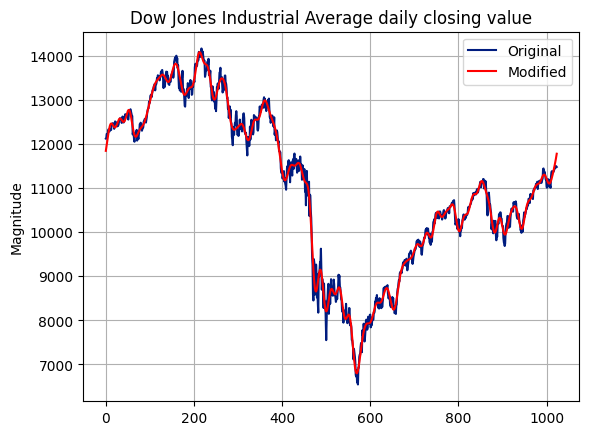

In [ ]:
#Comparison

#Use subplots to make one graph for both configurations
fig, ax = plt.subplots()
ax.plot(dow, label='Original')
ax.plot(d, label='Modified', c = 'r')
ax.set_title('Dow Jones Industrial Average daily closing value')
ax.set_ylabel('Magnitude')
ax.grid(True)
ax.legend()
plt.show()

### Conclusion

As shown in the graph above, the modified Dow Jones Industrial Average daily closing value depicts a more smoother graph with less changes in the the small scale. This happens while retaining most of the function's behavior. With the removal of other samples, the Nyquist frequency is lowered as the number of samples is lowered.

> The removal of the 90% of the frequencies smoothen the graph of the original function but it lowers its accuracy for signal processing.